## Task 3: Prediction using Decision Tree Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

### Importing Iris Dataset

In [3]:
df = pd.read_csv('Iris.csv',index_col='Id')

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# lets see if any null is present
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Species',axis=1).values
y = df['Species'].values

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=100)

### Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Visualizing Decision Tree

In [11]:
from sklearn.tree import plot_tree

In [12]:
f = df.drop('Species',axis=1).columns
c = df['Species'].unique()

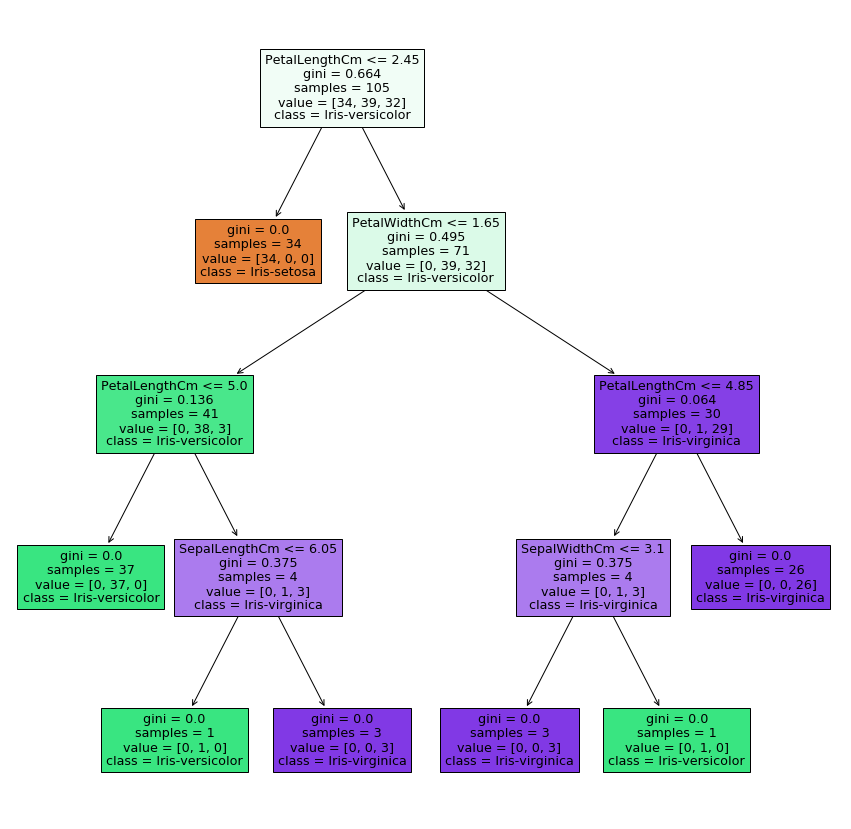

In [13]:
plt.figure(figsize=(15,15))
plot_tree(dtree,feature_names=f,class_names=c,filled=True)
plt.show()

### Checking Accuracy 

In [14]:
prediction = dtree.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [17]:
print(accuracy_score(y_test,prediction).round(3)*100)

95.6


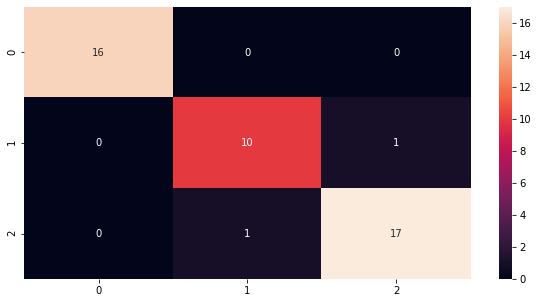

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)